In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df=pd.read_csv('ParisHousing.csv')

In [131]:
df = df.drop('cityCode', 1)


In [132]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [133]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [135]:
X=df.drop(['price'],axis=1).values
Y=df['price'].values

In [136]:
X

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]], dtype=int64)

In [137]:
Y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [138]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,random_state=42)

In [139]:
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

In [140]:
Y_pred

array([7964651.78, 3698491.04, 8566731.24, ...,  513518.06, 2775051.96,
       5981574.52])

In [141]:
mean_squared_error(Y_pred,Y_test)

715930747.8081433

In [142]:
mean_squared_error(Y_pred,Y_test)**(1/2)

26756.882251266557

In [143]:
from sklearn.metrics import mean_absolute_error

In [144]:
mean_absolute_error(Y_pred,Y_test)

21063.957848000013

In [145]:
test=pd.DataFrame(Y_test, columns=['Y_test'])

In [146]:
test['Y_pred']=Y_pred

In [147]:
test

,Y_test,Y_pred
0,7964369.6,7964651.78
1,3713548.9,3698491.04
2,8553019.2,8566731.24
3,6428666.2,6418510.74
4,6465184.9,6482812.16
...,...,...
2495,5161447.9,5207147.86
2496,7248658.3,7240321.64
2497,541400.2,513518.06
2498,2744762.0,2775051.96


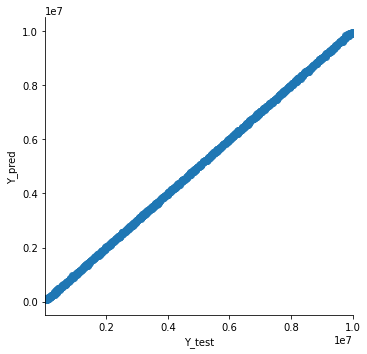

In [148]:
sns.lmplot(data=test, x='Y_test', y='Y_pred')

In [149]:
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression()

In [150]:
Y_pred=linear.predict(X_test)

In [151]:
mean_squared_error(Y_pred, Y_test)

3633757.398033838

In [152]:
mean_absolute_error(Y_pred, Y_test)

1491.2267018862021

In [153]:
test['Y_test']=Y_test
test['Y_pred']=Y_pred

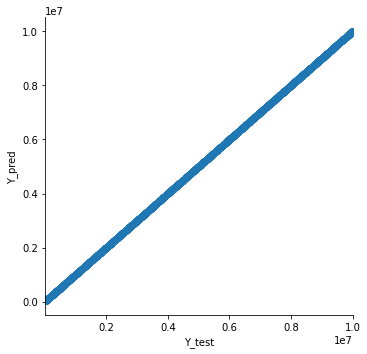

In [154]:
sns.lmplot(data=test, x='Y_test', y='Y_pred')

In [155]:
#knn: mean_squared_error=715930747.8081433
#linear: mean_squared_error=3633757.398033838

#knn: mean_absolute_error=21063.957848000013
#linear: mean_absolute_error=1491.2267018862021

#din datele prezentate reiesa ca metoda lineara este mai buna